In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [126]:
df = pd.read_csv('HTRU_2.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [128]:
df = df.values[:,:-1]

In [129]:
df = pd.DataFrame(df,index=None)
df.head()

,0,1,2,3,4,5,6,7
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [130]:
pca = PCA(n_components=2)

In [131]:
r_data = pca.fit_transform(df)
r_data

array([[ -27.20670276,  -29.67801976],
       [  24.45644993,   -6.17118905],
       [ -39.95725079,  -11.00843974],
       ...,
       [-103.28929329,   -0.58419743],
       [  31.7768649 ,  -11.0777767 ],
       [-127.65763743,  157.256271  ]])

In [132]:
data = preprocessing.scale(r_data)

In [133]:
data = pd.DataFrame(data,columns=['X','Y'])
data.head()

,X,Y
0,-0.251679,-0.916959
1,0.226237,-0.190671
2,-0.369629,-0.340127
3,-0.444179,-0.922409
4,1.368113,0.568194


# **K-Means Clustering**

In [134]:
sse = []
for k in range(1,10):
  km = KMeans(n_clusters=k)
  km.fit(data)
  sse.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

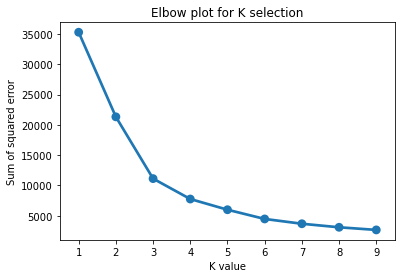

In [135]:
#plt.plot(np.arange(1,10),sse)
sns.pointplot(x=np.arange(1,10),y=sse)
plt.title('Elbow plot for K selection')
plt.xlabel('K value')
plt.ylabel('Sum of squared error')

In [136]:
from kneed import KneeLocator
kl = KneeLocator(np.arange(1,10), sse, S=1.0, curve="convex", direction="decreasing")
print(kl.elbow)

3


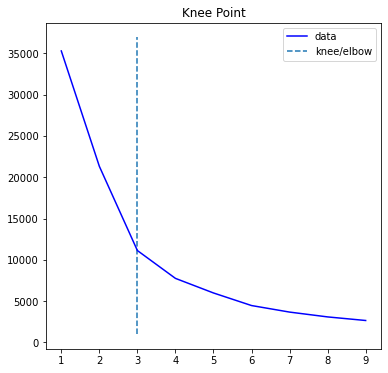

In [137]:
kl.plot_knee()

In [138]:
kmeans = KMeans(n_clusters=3)

In [139]:
cluster = kmeans.fit_predict(data[['X','Y']])

In [140]:
data['cluster'] = cluster

In [141]:
data.head()

,X,Y,cluster
0,-0.251679,-0.916959,1
1,0.226237,-0.190671,1
2,-0.369629,-0.340127,1
3,-0.444179,-0.922409,1
4,1.368113,0.568194,0


In [142]:
data['cluster'].value_counts()

1    13959
0     1978
2     1702
Name: cluster, dtype: int64

In [143]:
df1 = data[data['cluster']==0]
df2 = data[data['cluster']==1]
df3 = data[data['cluster']==2]

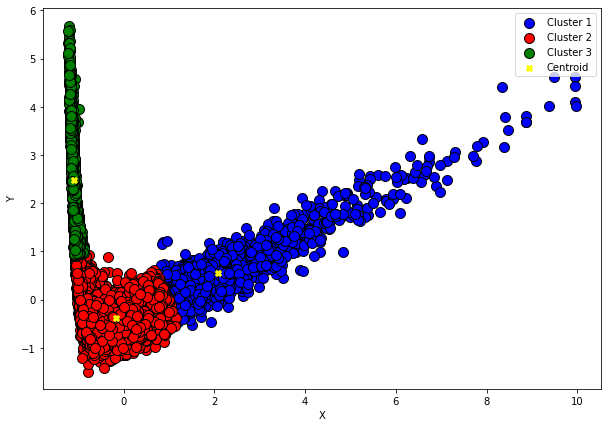

In [144]:
plt.figure(figsize=(10,7))
plt.scatter(df1.values[:,0],df1.values[:,1],color="blue",label='Cluster 1', edgecolors='black',s=100)
plt.scatter(df2.values[:,0],df2.values[:,1],color="red",label='Cluster 2', edgecolors='black',s=100)
plt.scatter(df3.values[:,0],df3.values[:,1],color="green",label='Cluster 3', edgecolors='black',s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='X',color='yellow',label='Centroid')
plt.legend()

# **DBSCAN Clustering**

In [145]:
db = DBSCAN(eps=1.0,metric='euclidean')

In [146]:
pr = db.fit_predict(data)

In [147]:
data['cluster']=pr

In [148]:
data.head()

,X,Y,cluster
0,-0.251679,-0.916959,0
1,0.226237,-0.190671,0
2,-0.369629,-0.340127,0
3,-0.444179,-0.922409,0
4,1.368113,0.568194,1


In [149]:
data['cluster'].value_counts()

0    13959
1     1978
2     1702
Name: cluster, dtype: int64

In [150]:
outliers_data = data[data['cluster']==-1]
cluster1_data = data[data['cluster']==0]
cluster2_data = data[data['cluster']==1]
cluster3_data = data[data['cluster']==2]

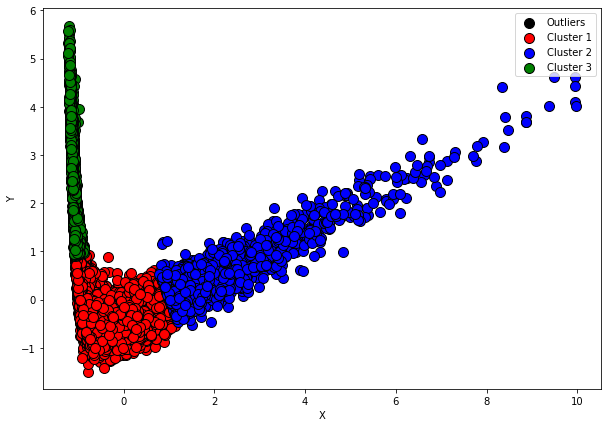

In [151]:
plt.figure(figsize=(10,7))
plt.scatter(outliers_data['X'],outliers_data['Y'],color='black',label='Outliers', edgecolors='black',s=100)
plt.scatter(cluster1_data['X'],cluster1_data['Y'],color='red',label='Cluster 1', edgecolors='black',s=100)
plt.scatter(cluster2_data['X'],cluster2_data['Y'],color='blue',label='Cluster 2', edgecolors='black',s=100)
plt.scatter(cluster3_data['X'],cluster3_data['Y'],color='green',label='Cluster 3', edgecolors='black',s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# **Hierarchical Clustering**

In [152]:
import scipy.cluster.hierarchy as sch

In [153]:
data1 = data.sample(100)

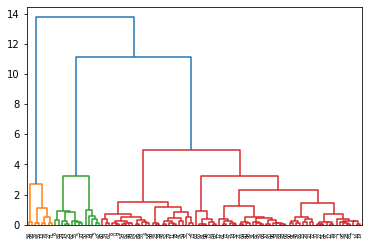

In [154]:
dend = sch.dendrogram(sch.linkage(data1.values,method='ward'))

In [155]:
H = AgglomerativeClustering(n_clusters=2,linkage='ward',affinity='euclidean')

In [156]:
pred = H.fit_predict(data)

In [157]:
temp = data

In [158]:
temp['cluster'] = pred

In [159]:
temp['cluster'].value_counts()

0    15937
1     1702
Name: cluster, dtype: int64

In [160]:
temp1 = temp[temp['cluster']==0]
temp2 = temp[temp['cluster']==1]

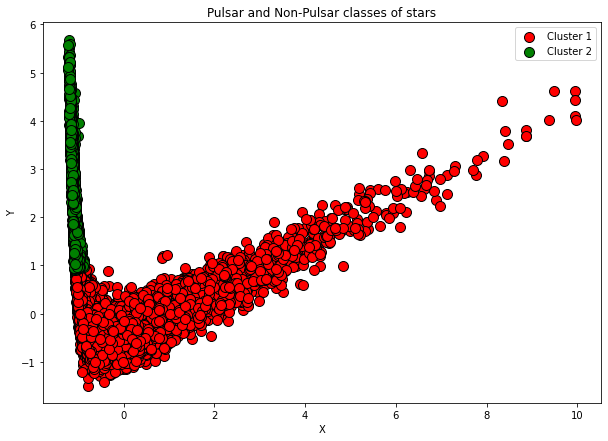

In [161]:
plt.figure(figsize=(10,7))
plt.scatter(temp1.values[:,0],temp1.values[:,1],color="red",label='Cluster 1', edgecolors='black',s=100)
plt.scatter(temp2.values[:,0],temp2.values[:,1],color="green",label='Cluster 2', edgecolors='black',s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pulsar and Non-Pulsar classes of stars')
plt.legend()

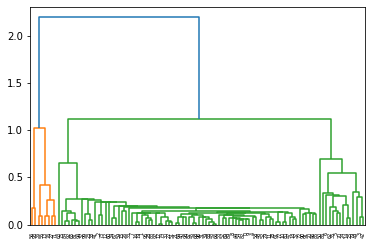

In [162]:
dend = sch.dendrogram(sch.linkage(data1.values,method='single'))

In [163]:
H = AgglomerativeClustering(n_clusters=2,linkage='single',affinity='euclidean')

In [164]:
pred = H.fit_predict(data)

In [165]:
temp = data

In [166]:
temp['cluster'] = pred

In [167]:
temp['cluster'].value_counts()

0    15937
1     1702
Name: cluster, dtype: int64

In [168]:
temp1 = temp[temp['cluster']==0]
temp2 = temp[temp['cluster']==1]

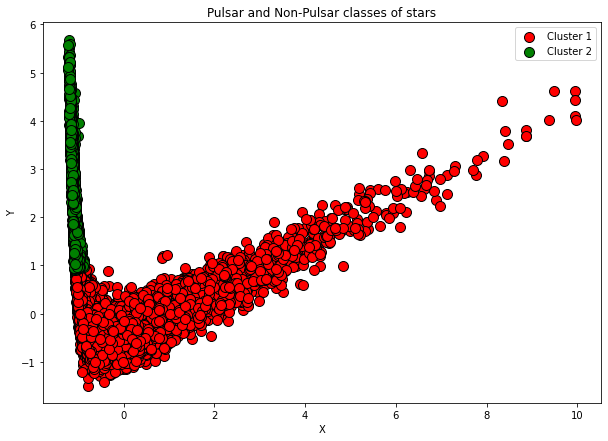

In [169]:
plt.figure(figsize=(10,7))
plt.scatter(temp1.values[:,0],temp1.values[:,1],color="red",label='Cluster 1', edgecolors='black',s=100)
plt.scatter(temp2.values[:,0],temp2.values[:,1],color="green",label='Cluster 2', edgecolors='black',s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pulsar and Non-Pulsar classes of stars')
plt.legend()

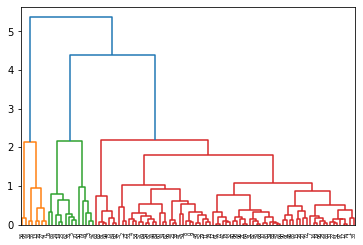

In [170]:
dend = sch.dendrogram(sch.linkage(data1.values,method='complete'))

In [171]:
H = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='euclidean')

In [172]:
pred = H.fit_predict(data)

In [173]:
temp = data

In [174]:
temp['cluster'] = pred

In [175]:
temp['cluster'].value_counts()

1    17388
0      251
Name: cluster, dtype: int64

In [176]:
temp1 = temp[temp['cluster']==0]
temp2 = temp[temp['cluster']==1]

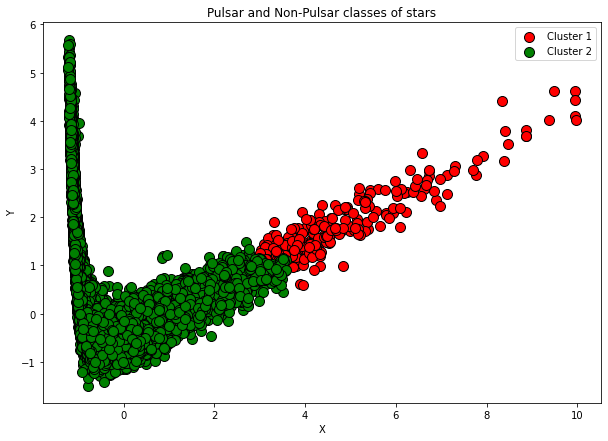

In [177]:
plt.figure(figsize=(10,7))
plt.scatter(temp1.values[:,0],temp1.values[:,1],color="red",label='Cluster 1', edgecolors='black',s=100)
plt.scatter(temp2.values[:,0],temp2.values[:,1],color="green",label='Cluster 2', edgecolors='black',s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pulsar and Non-Pulsar classes of stars')
plt.legend()